In [1]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series
# Settings for pretty nice plots 
plt.style.use('fivethirtyeight')
%matplotlib inline
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/MARUTI.csv')

In [3]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2003-07-09,MARUTI,EQ,125.00,164.90,170.40,155.00,164.0,164.30,165.95,35164283,5.835528e+14,NaN,8537695.0,0.2428
1,2003-07-10,MARUTI,EQ,164.30,167.00,168.70,164.50,167.0,167.00,166.74,10464179,1.744820e+14,NaN,4363947.0,0.4170
2,2003-07-11,MARUTI,EQ,167.00,167.75,174.85,166.25,173.6,173.35,172.45,11740117,2.024622e+14,NaN,3014852.0,0.2568
3,2003-07-14,MARUTI,EQ,173.35,174.25,179.25,174.25,178.6,177.95,177.91,5982324,1.064313e+14,NaN,1949217.0,0.3258
4,2003-07-15,MARUTI,EQ,177.95,200.00,200.00,173.00,176.3,176.20,176.88,6173689,1.092001e+14,NaN,1307694.0,0.2118


In [4]:
data = df[['Date','Open','High','Low','Close','Volume','VWAP']]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4305 non-null   object 
 1   Open    4305 non-null   float64
 2   High    4305 non-null   float64
 3   Low     4305 non-null   float64
 4   Close   4305 non-null   float64
 5   Volume  4305 non-null   int64  
 6   VWAP    4305 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 235.6+ KB


In [6]:
data['Date'] = data['Date'].apply(pd.to_datetime)
data.set_index('Date',inplace=True)
data.head()

,Open,High,Low,Close,Volume,VWAP
Date,,,,,,
2003-07-09,164.90,170.40,155.00,164.30,35164283,165.95
2003-07-10,167.00,168.70,164.50,167.00,10464179,166.74
2003-07-11,167.75,174.85,166.25,173.35,11740117,172.45
2003-07-14,174.25,179.25,174.25,177.95,5982324,177.91
2003-07-15,200.00,200.00,173.00,176.20,6173689,176.88


In [7]:
from datetime import datetime
my_year = 2019
my_month = 4
my_day = 21
my_hour = 10
my_minute = 5
my_second = 30

In [8]:
test_data = datetime(my_year,my_month,my_day)
test_data
datetime(2019, 4, 21, 0, 0)

datetime.datetime(2019, 4, 21, 0, 0)

In [9]:
test_data = datetime(my_year,my_month,my_day,my_hour,my_minute,my_second)
print("The day is : ",test_data.day)
print("The hour is : ",test_data.hour)
print("The month is : ",test_data.month)

The day is :  21
The hour is :  10
The month is :  4


In [10]:
print(data.index.max())
print(data.index.min())

2020-10-30 00:00:00
2003-07-09 00:00:00


In [11]:
# Earliest date index location
print('Earliest date index location is: ',data.index.argmin())

# Latest date location
print('Latest date location: ',data.index.argmax())

Earliest date index location is:  0
Latest date location:  4304


In [12]:
df_vwap = df[['Date','VWAP']] # df is the original dataframe
df_vwap['Date'] = df_vwap['Date'].apply(pd.to_datetime)
df_vwap.set_index("Date", inplace = True)
df_vwap.head()

,VWAP
Date,
2003-07-09,165.95
2003-07-10,166.74
2003-07-11,172.45
2003-07-14,177.91
2003-07-15,176.88


In [13]:
# Slicing on year
vwap_subset = df_vwap['2017':'2020']

# Slicing on month
vwap_subset = df_vwap['2017-01':'2020-12']

#Slicing on day
vwap_subset = df_vwap['2017-01-01':'2020-12-15']

<Axes: title={'right': ' volume weighted average price'}, xlabel='Date'>

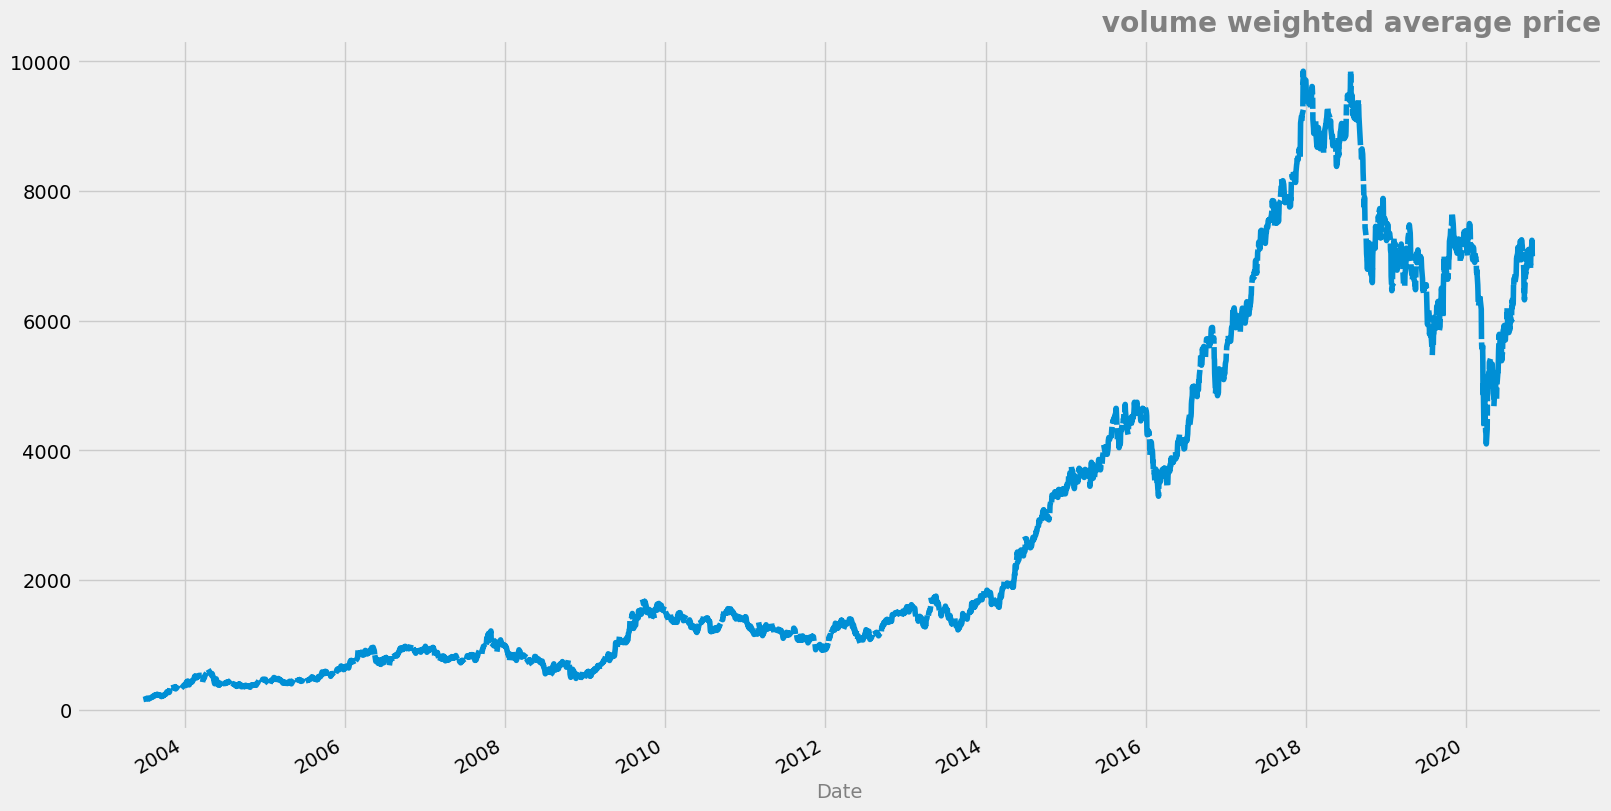

In [14]:
df_vwap['VWAP'].plot(figsize=(16,8),title=' volume weighted average price')

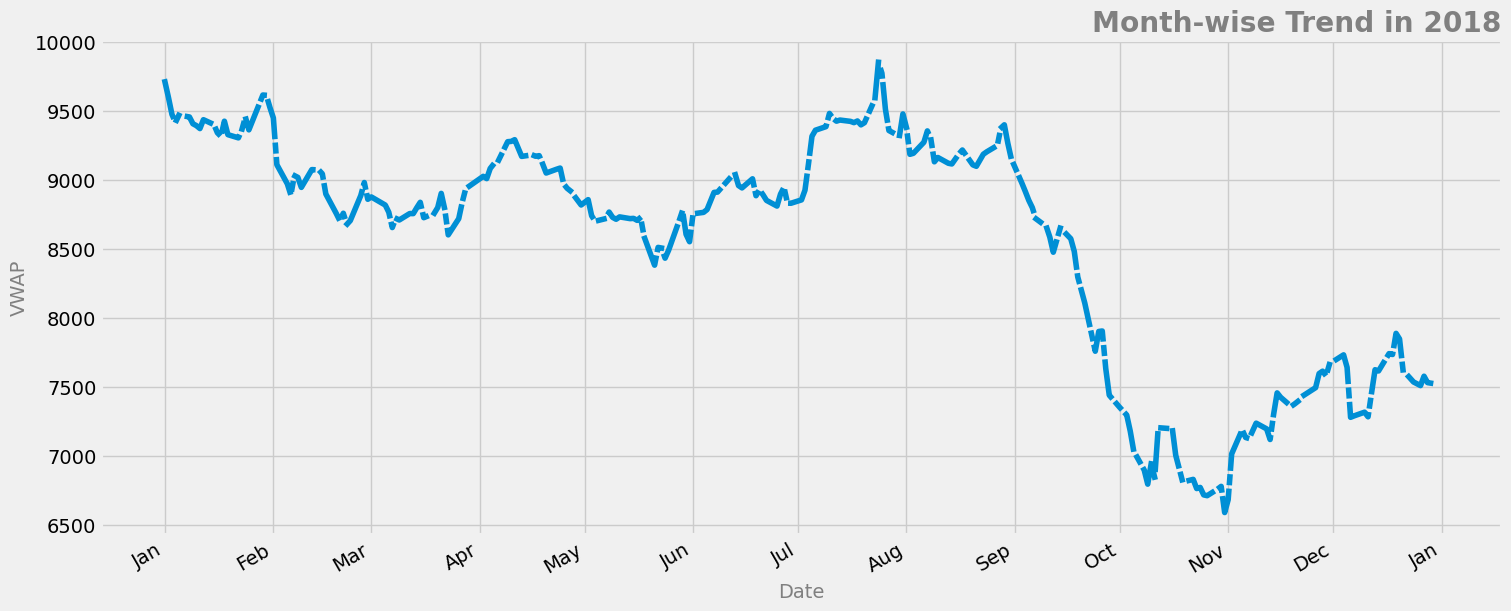

In [15]:
ax = df_vwap.loc['2018', 'VWAP'].plot(figsize=(15,6))
ax.set_title('Month-wise Trend in 2018'); 
ax.set_ylabel('VWAP');
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'));

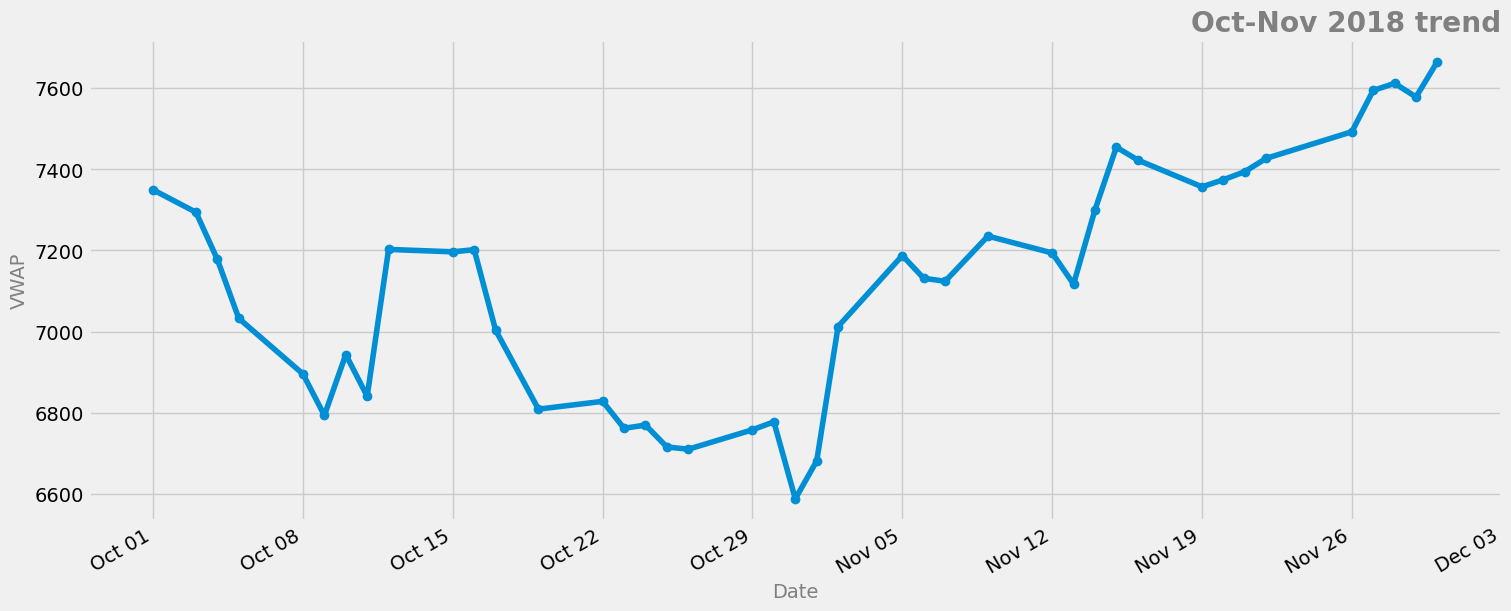

In [16]:
ax = df_vwap.loc['2018-10':'2018-11','VWAP'].plot(marker='o', linestyle='-',figsize=(15,6))
ax.set_title('Oct-Nov 2018 trend'); 
ax.set_ylabel('VWAP');
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [17]:
df_vwap.reset_index(inplace=True)
df_vwap['year'] = df_vwap.Date.dt.year
df_vwap['month'] = df_vwap.Date.dt.month
df_vwap['day'] = df_vwap.Date.dt.day
df_vwap['day of week'] = df_vwap.Date.dt.dayofweek

#Set Date column as the index column.
df_vwap.set_index('Date', inplace=True)
df_vwap.head()

,VWAP,year,month,day,day of week
Date,,,,,
2003-07-09,165.95,2003,7,9,2
2003-07-10,166.74,2003,7,10,3
2003-07-11,172.45,2003,7,11,4
2003-07-14,177.91,2003,7,14,0
2003-07-15,176.88,2003,7,15,1


In [18]:
df_vwap.resample(rule = 'A').mean()[:5]

,VWAP,year,month,day,day of week
Date,,,,,
2003-12-31,266.608468,2003.0,9.604839,16.298387,2.016129
2004-12-31,430.522835,2004.0,6.559055,15.708661,2.047244
2005-12-31,494.328566,2005.0,6.541833,15.733068,2.000000
2006-12-31,845.582160,2006.0,6.552000,15.976000,2.056000
2007-12-31,887.107871,2007.0,6.554217,15.843373,1.987952


Text(1.0, 1.0, 'Yearly Mean VWAP for Maruti')

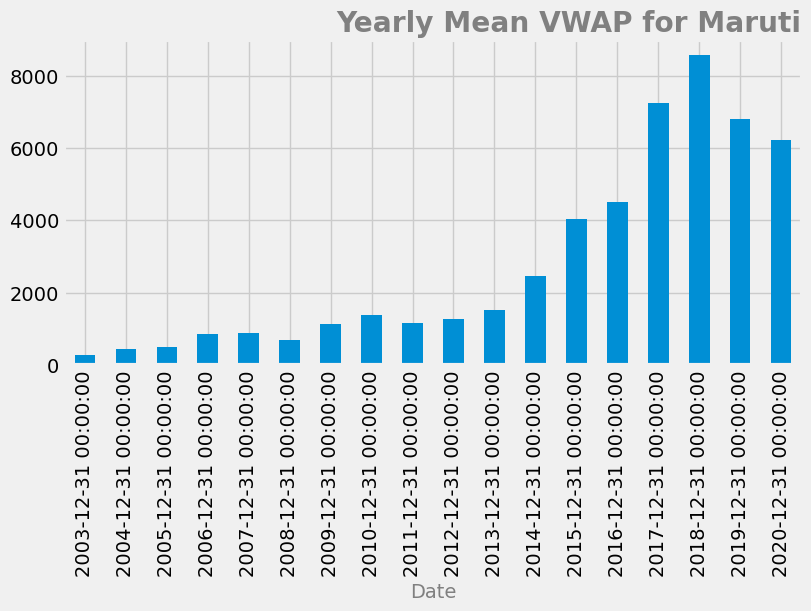

In [19]:
plt.rcParams['figure.figsize'] = (8, 6)
df_vwap['VWAP'].resample('A').mean().plot(kind='bar')
plt.title('Yearly Mean VWAP for Maruti')

Text(1.0, 1.0, 'Yearly start Mean VWAP for Maruti')

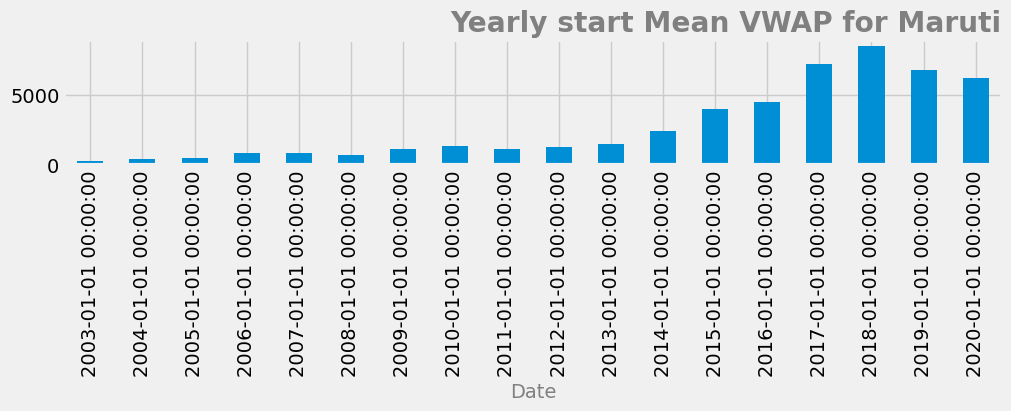

In [20]:
df_vwap['VWAP'].resample('AS').mean().plot(kind='bar',figsize = (10,4))
plt.title('Yearly start Mean VWAP for Maruti')

In [21]:
df_vwap.head()

,VWAP,year,month,day,day of week
Date,,,,,
2003-07-09,165.95,2003,7,9,2
2003-07-10,166.74,2003,7,10,3
2003-07-11,172.45,2003,7,11,4
2003-07-14,177.91,2003,7,14,0
2003-07-15,176.88,2003,7,15,1


In [22]:
df_vwap.shift(1).head()

,VWAP,year,month,day,day of week
Date,,,,,
2003-07-09,NaN,NaN,NaN,NaN,NaN
2003-07-10,165.95,2003.0,7.0,9.0,2.0
2003-07-11,166.74,2003.0,7.0,10.0,3.0
2003-07-14,172.45,2003.0,7.0,11.0,4.0
2003-07-15,177.91,2003.0,7.0,14.0,0.0


In [23]:
df_vwap.shift(-1).head()

,VWAP,year,month,day,day of week
Date,,,,,
2003-07-09,166.74,2003.0,7.0,10.0,3.0
2003-07-10,172.45,2003.0,7.0,11.0,4.0
2003-07-11,177.91,2003.0,7.0,14.0,0.0
2003-07-14,176.88,2003.0,7.0,15.0,1.0
2003-07-15,177.59,2003.0,7.0,16.0,2.0


In [24]:
df_vwap.shift(periods=3, freq = 'M').head()

,VWAP,year,month,day,day of week
Date,,,,,
2003-09-30,165.95,2003,7,9,2
2003-09-30,166.74,2003,7,10,3
2003-09-30,172.45,2003,7,11,4
2003-09-30,177.91,2003,7,14,0
2003-09-30,176.88,2003,7,15,1


<Axes: xlabel='Date'>

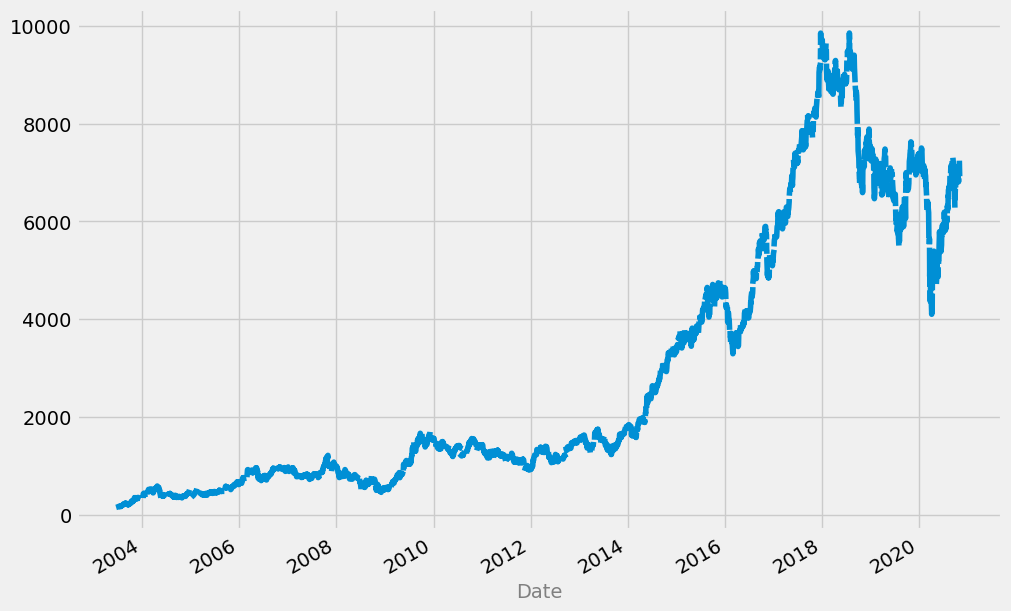

In [25]:
df_vwap['VWAP'].plot(figsize = (10,6))

In [26]:
df_vwap.rolling(7).mean().head(10)

,VWAP,year,month,day,day of week
Date,,,,,
2003-07-09,NaN,NaN,NaN,NaN,NaN
2003-07-10,NaN,NaN,NaN,NaN,NaN
2003-07-11,NaN,NaN,NaN,NaN,NaN
2003-07-14,NaN,NaN,NaN,NaN,NaN
2003-07-15,NaN,NaN,NaN,NaN,NaN
2003-07-16,NaN,NaN,NaN,NaN,NaN
2003-07-17,173.285714,2003.0,7.0,13.142857,2.142857
2003-07-18,173.530000,2003.0,7.0,14.428571,2.428571
2003-07-21,173.520000,2003.0,7.0,16.000000,2.000000


<Axes: xlabel='Date'>

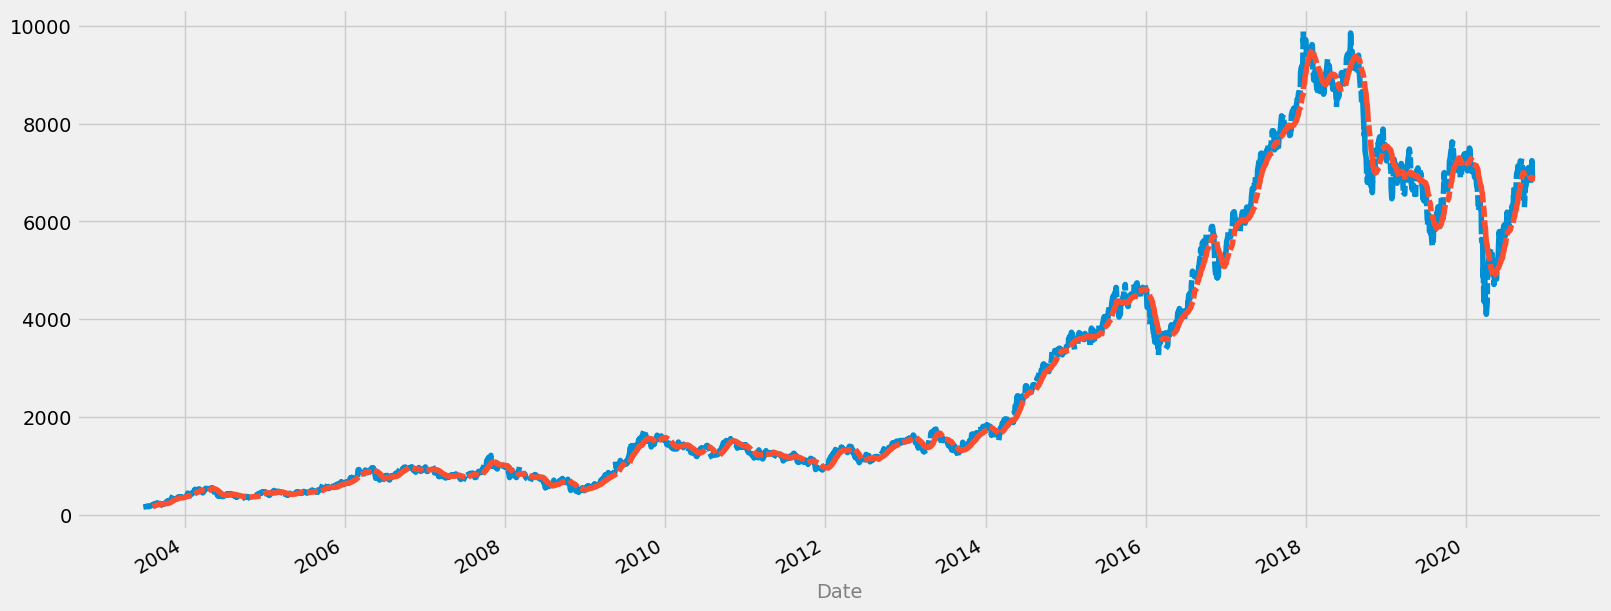

In [27]:
df_vwap['VWAP'].plot()
df_vwap.rolling(window=30).mean()['VWAP'].plot(figsize=(16, 6))